<a href="https://colab.research.google.com/github/Naiya711/naiya711/blob/main/SLF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# importing libraries for data analyzing in python
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# giving colab access to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# allocating path for file
data = pd.read_csv('/content/drive/MyDrive/used_device_data.csv')

In [ ]:
# viewing first five rows of data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [ ]:
# finding number of rows and columns
data.shape

(3454, 15)

In [ ]:
# finding data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
# finding description of whole data
data.describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


In [ ]:
# last five rows of data
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# finding duplicated value if any
data.duplicated().sum()

0

In [ ]:
# finding null values if any
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [ ]:
# finding data types of columns
data.dtypes

,0
brand_name,object
os,object
screen_size,float64
4g,object
5g,object
main_camera_mp,float64
selfie_camera_mp,float64
int_memory,float64
ram,float64
battery,float64


Replacing null values with median value of the column: null values can be replaced with median when there is presence of continuous numerical value.

In [ ]:
# finding unique values of main_camera_mp column
data['main_camera_mp'].unique()

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,   nan,  2.  , 16.  ,  0.3 ,
       12.  , 14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08,
       20.7 , 23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  ,
       12.5 , 10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 ,
       19.  , 21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

In [ ]:
# finding median of column
data['main_camera_mp'].median()

8.0

In [ ]:
# replacing the null values of column with median of the column
data['main_camera_mp'] = data['main_camera_mp'].fillna(data['main_camera_mp'].median())

In [ ]:
# finding null values after replacement
data['main_camera_mp'].isnull().sum()

0

In [ ]:
# unique values of columns
data['selfie_camera_mp'].unique()

array([ 5.  , 16.  ,  8.  , 32.  ,  2.  ,  0.3 , 13.  , 14.5 , 24.  ,
       10.  ,  1.3 , 20.  , 25.  ,  0.  , 12.  ,  7.  ,  1.2 ,  3.  ,
        2.1 ,  1.  ,  4.  ,  1.1 ,   nan, 10.5 ,  1.6 ,  1.8 ,  3.5 ,
        0.9 ,  1.25, 18.  ,  1.9 ,  9.  ,  3.7 , 16.3 ,  5.1 ,  2.2 ,
       14.  ,  0.65])

In [ ]:
# finding median of column
data['selfie_camera_mp'].median()

5.0

In [ ]:
# replacing null with median
data['selfie_camera_mp'] = data['selfie_camera_mp'].fillna(data['selfie_camera_mp'].median())

In [ ]:
# finding null after replacement
data['selfie_camera_mp'].isnull().sum()

0

In [ ]:
# replacing null value with median of the column int_memory
data['int_memory'].median()

32.0

In [ ]:
data['int_memory'] = data['int_memory'].fillna(data['int_memory'].median())

In [ ]:
data['int_memory'].isnull().sum()

0

In [ ]:
# replacing null value with median value of the column ram
data['ram'].median()

4.0

In [ ]:
data['ram'] = data['ram'].fillna(data['ram'].median())

In [ ]:
data['ram'].isnull().sum()

0

In [ ]:
# replacing null value with median value of the column battery
data['battery'].median()

3000.0

In [ ]:
data['battery'] = data['battery'].fillna(data['battery'].median())

In [ ]:
data['battery'].isnull().sum()

0

In [ ]:
# replacing null value with median value of the column weight
data['weight'].median()

160.0

In [ ]:
data['weight'] = data['weight'].fillna(data['weight'].median())

In [ ]:
data['weight'].isnull().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Univariate Analysis**

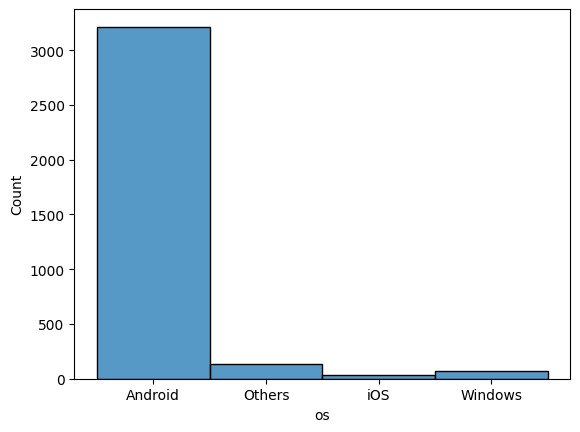

In [ ]:
# univariate analysis of os
sns.histplot(data=data, x='os');

**What does the distribution of normalized used device prices look like?:**

In [ ]:
# finding the proportion of each os in data
data['os'].value_counts(normalize=True)

,proportion
os,
Android,0.930515
Others,0.039664
Windows,0.019398
iOS,0.010423


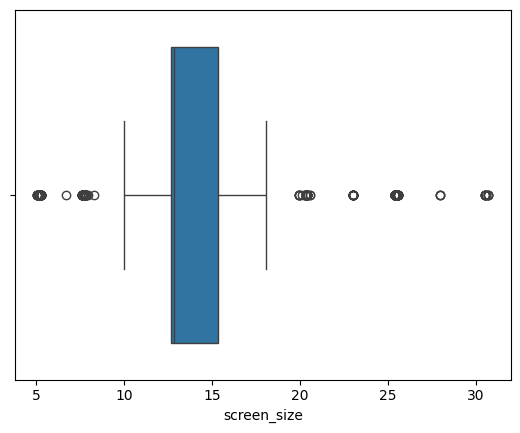

In [ ]:
# univariate analysis of screen_size
sns.boxplot(data=data, x='screen_size');

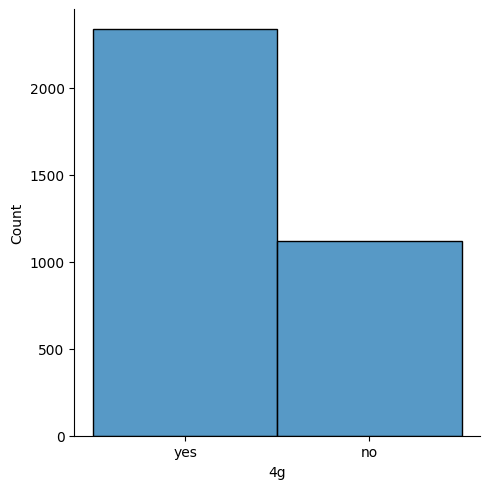

In [ ]:
# univariate analysis of 4g
sns.displot(data=data, x='4g');

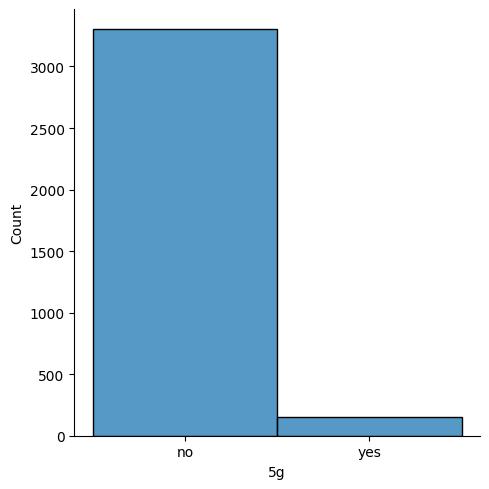

In [ ]:
# univariate analysis of 5g
sns.displot(data=data, x='5g');

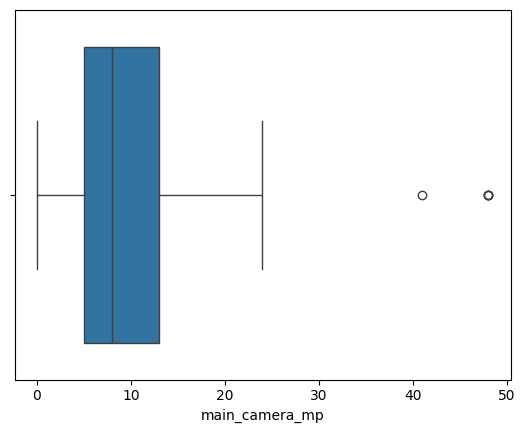

In [ ]:
# univariate analysis of main_camera_mp
sns.boxplot(data=data, x='main_camera_mp');

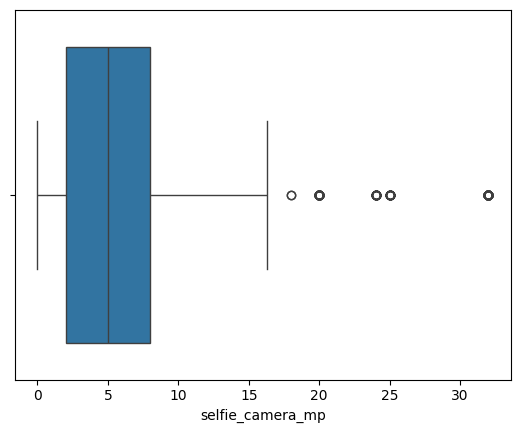

In [ ]:
# univariate analysis of selfie_camera_mp
sns.boxplot(data=data, x='selfie_camera_mp');

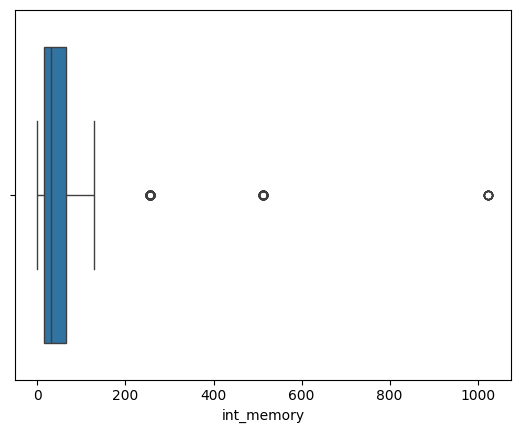

In [ ]:
# univariate analysis of int_memory
sns.boxplot(data=data, x='int_memory');

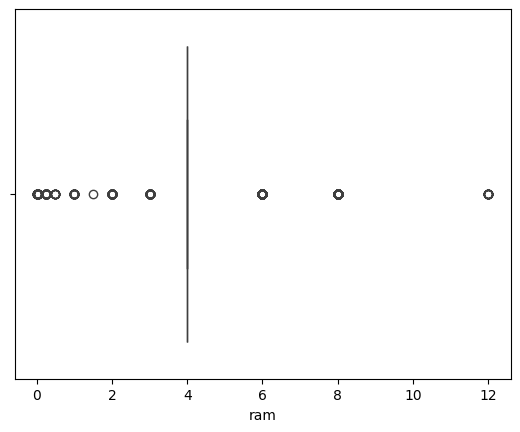

In [ ]:
# univariate analysis of ram
sns.boxplot(data=data, x='ram');

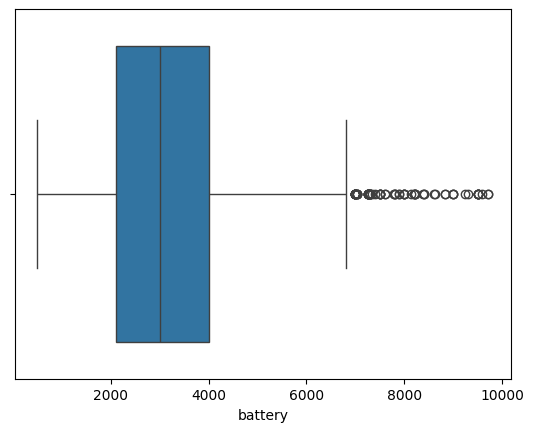

In [ ]:
# univariate analysis of battery
sns.boxplot(data=data, x='battery');

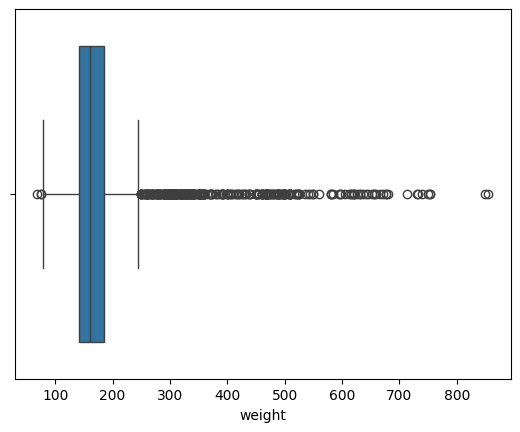

In [ ]:
# univariate analysis of weight
sns.boxplot(data=data, x='weight');

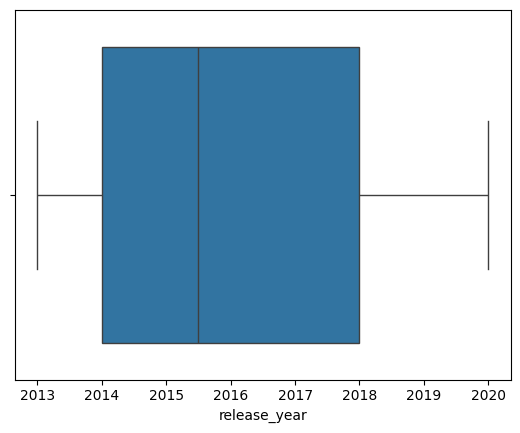

In [ ]:
# univariate analysis of release_year
sns.boxplot(data=data, x='release_year');

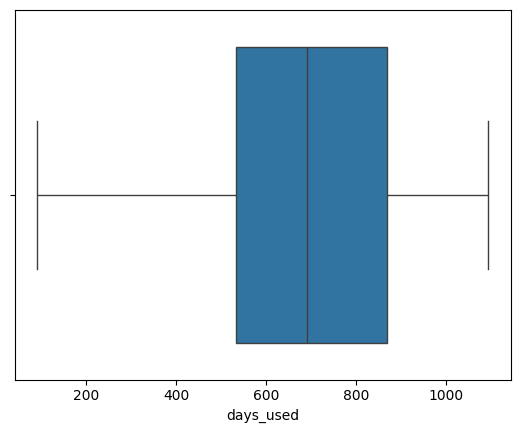

In [ ]:
# univariate analysis of days_used
sns.boxplot(data=data, x='days_used');

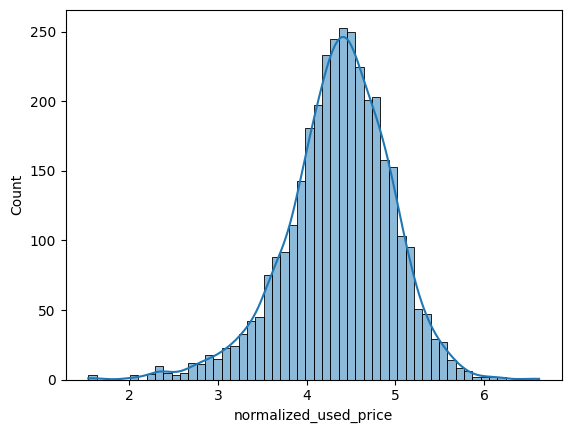

In [ ]:
# univariate analysis of normalized_used_price
sns.histplot(data=data, x='normalized_used_price', kde=True);

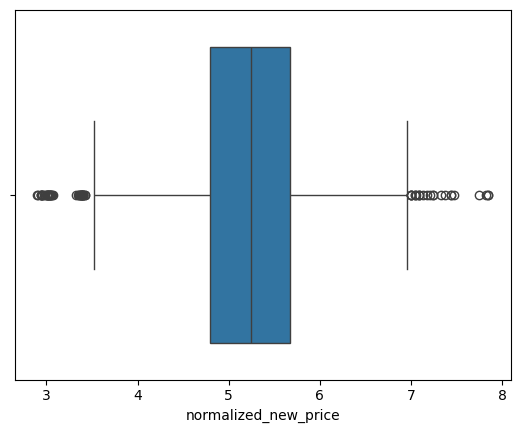

In [ ]:
# univariate analysis of normalized_new_price
sns.boxplot(data=data, x='normalized_new_price');

Bivariate Analysis

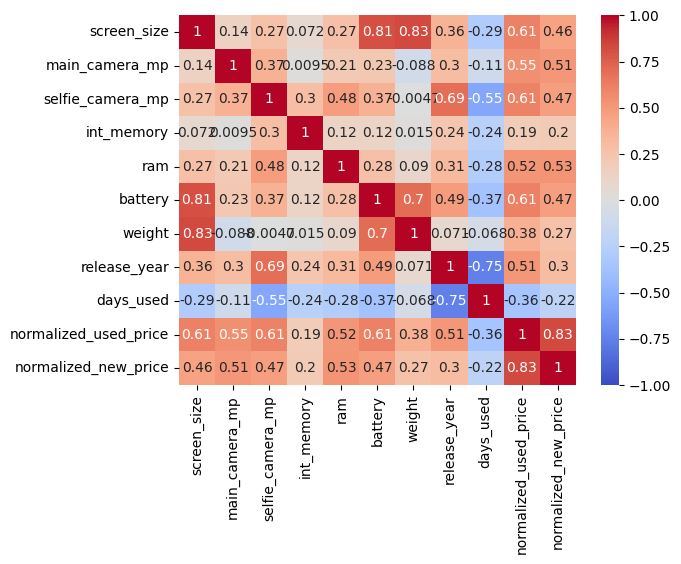

In [ ]:
# bivariate analysis of all numerical columns via heat map
column_list = data.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(data[column_list].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

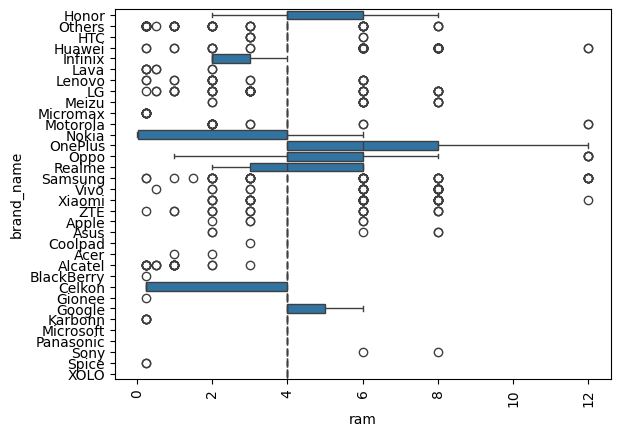

In [ ]:
# bivariate analysis of ram and brand_name
sns.boxplot(data=data, x='ram', y='brand_name')
plt.xticks(rotation=90);

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
# fltering data with battery more than 4500mAh
filtered_data = data[data['battery']>4500]

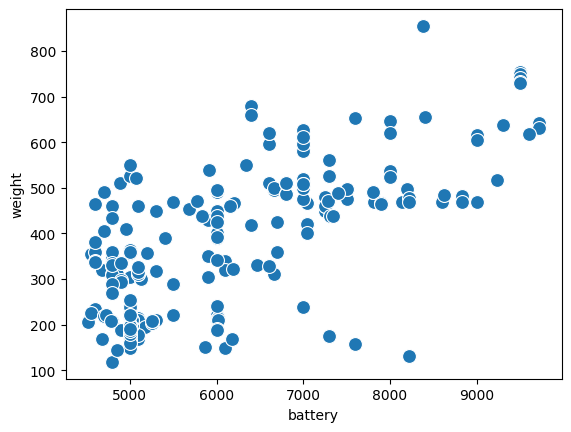

In [ ]:
# bivariate analyis of filtered data between column battery and weight
sns.scatterplot(data=filtered_data, x='battery', y='weight', s=100);

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
# filtering data with screen size larger than 6
filtered_screen_size = data[data['screen_size']>6]

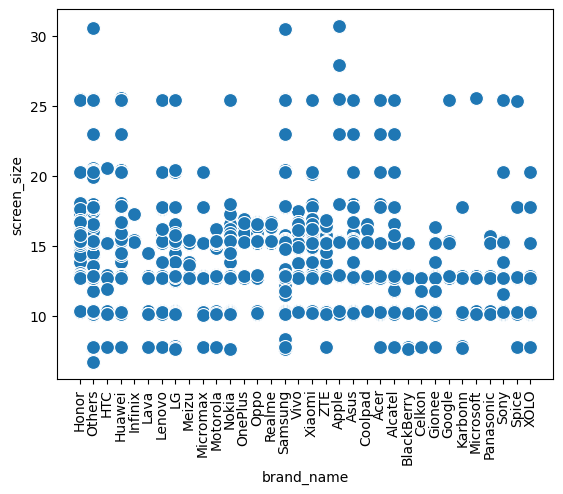

In [ ]:
# finding tthe relation between bran_name and screen_size after filtering the data
sns.scatterplot(data=filtered_screen_size, x='brand_name', y='screen_size', s=100)
plt.xticks(rotation=90);

In [ ]:
# finding the size of each brand_name column of filtered data
device_count_by_brand = filtered_screen_size.groupby('brand_name').size()

In [ ]:
device_count_by_brand

,0
brand_name,
Acer,51
Alcatel,115
Apple,39
Asus,122
BlackBerry,21
Celkon,25
Coolpad,22
Gionee,56
Google,15


**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
# filtering data with selfie_camera_mp greater than 8
filtered_selfie_camera = data[data['selfie_camera_mp']>8]

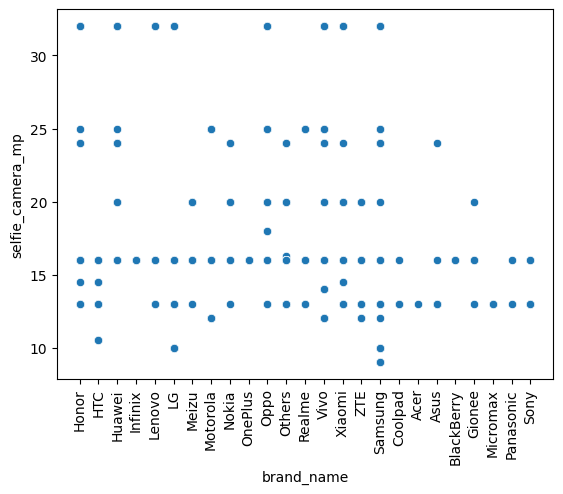

In [ ]:
# comparing brand_name with selfie_camera_mp after filtering the data
sns.scatterplot(data=filtered_selfie_camera, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90);

Which attributes are highly correlated with the normalized price of a used device?
Normalized_used_price is highly correlated with normalized_new_price and also slightly correlated with battery and main_camera_mp according to heat map. **bold text**

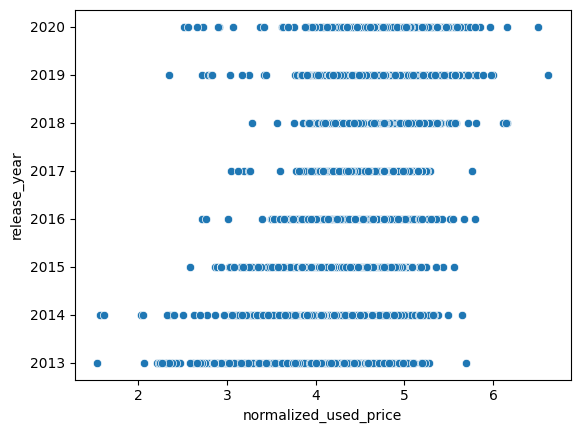

In [ ]:
# comparing the normalized_used_price with release_year of original data
sns.scatterplot(data=data, x='normalized_used_price', y='release_year');

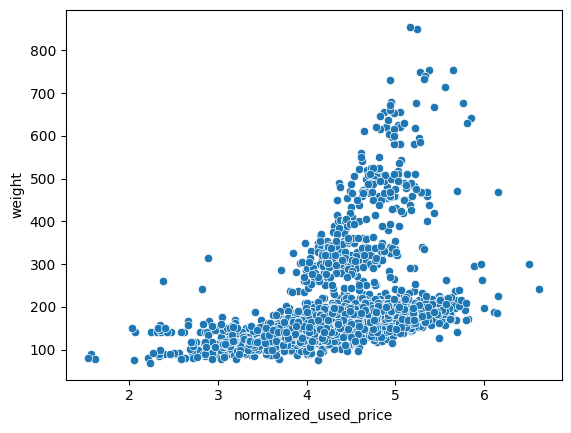

In [ ]:
# bivariate analysis of normalized_used_price with weight
sns.scatterplot(data=data, x='normalized_used_price', y='weight');

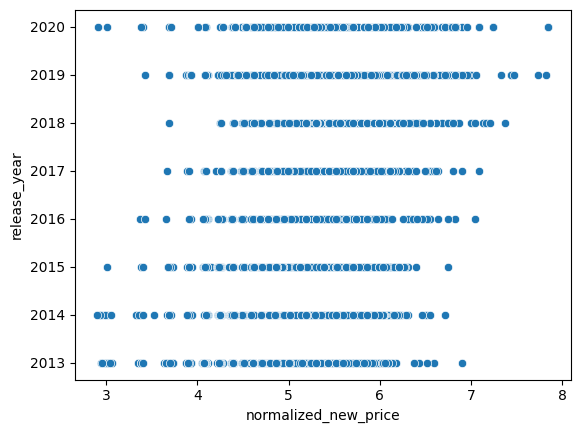

In [ ]:
# bivariate analysis of normalized_new_price with release_year
sns.scatterplot(data=data, x='normalized_new_price', y='release_year');

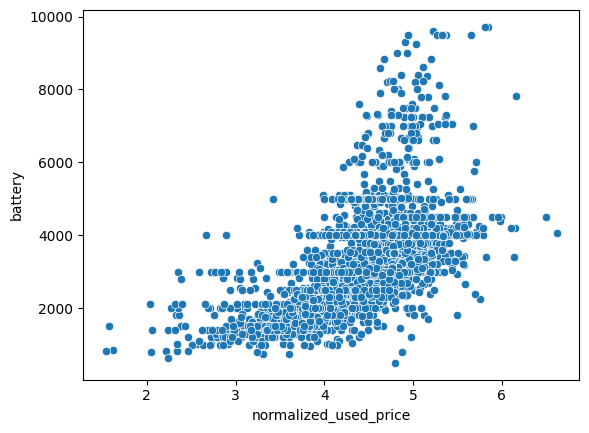

In [ ]:
# bivariate analysis of normalized_used_price with battery
sns.scatterplot(data=data, x='normalized_used_price', y='battery');

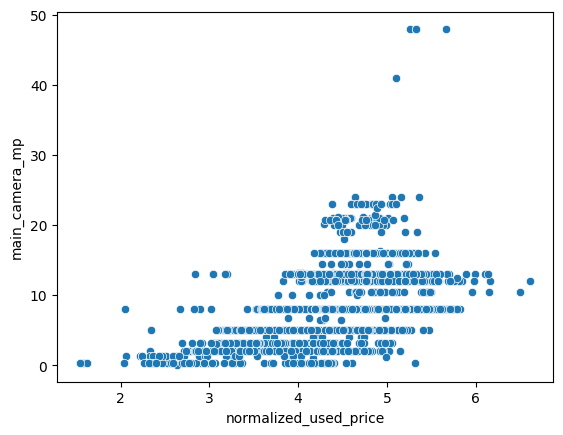

In [ ]:
# bivariate analysis of normalized_used_price with main_camera_mp
sns.scatterplot(data=data, x='normalized_used_price', y='main_camera_mp');

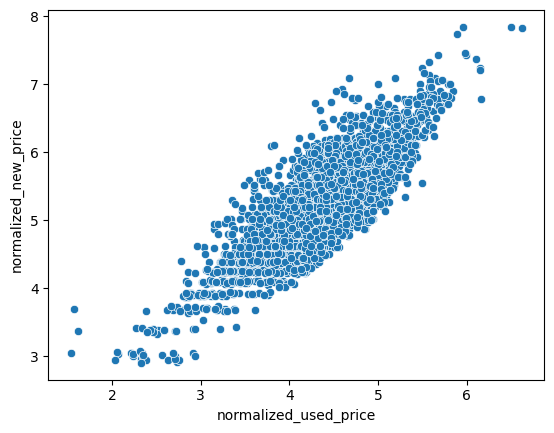

In [ ]:
# bivariate analysis of normalized_used_price with normalized_new_price
sns.scatterplot(data=data, x='normalized_used_price', y='normalized_new_price');

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Missing value treatment: it has been previously completed by replacing the missing values with median of the columns.

**Feature Engineering:**

In [ ]:
# finding unique values of release_year column
data['release_year'].unique()

array([2020, 2019, 2013, 2014, 2016, 2018, 2015, 2017])

In [ ]:
# copying the data into new variable
df = data.copy()

In [ ]:
# drop the release year and instead used years since release with reference to specified year
df['years_since_release'] = 2021 - data['release_year']
df.drop('release_year', axis=1, inplace=True)

In [ ]:
# description of years since release
df['years_since_release'].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


**Outlier Check:**

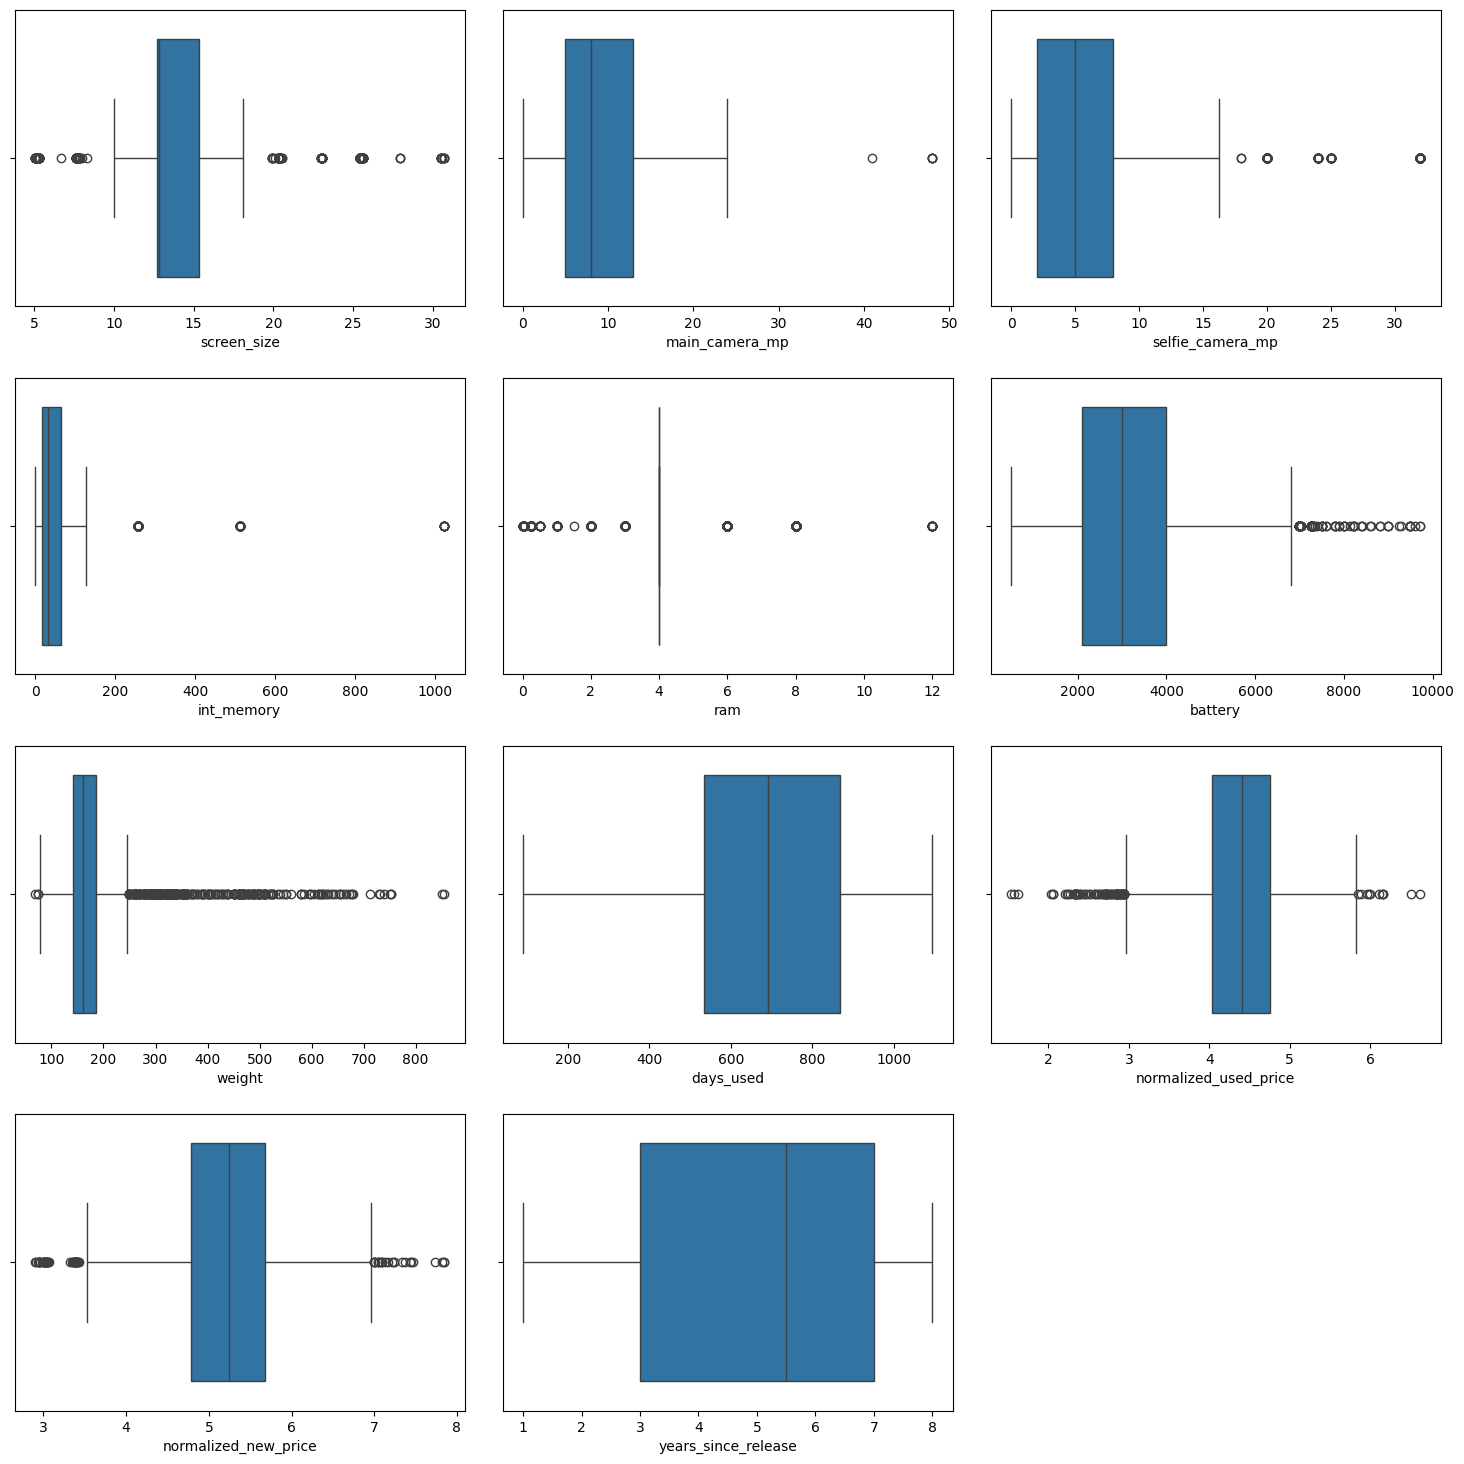

In [ ]:
# plotting graphs to check for outliers
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,15))

for i, col in enumerate(num_cols):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df, x=col)
  plt.tight_layout(pad=2);

**Preparing Data for Modeling:**

In [ ]:
# splitting data
X = df.drop('normalized_used_price', axis=1)
y = df['normalized_used_price']

In [ ]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [ ]:
y.head()

,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [ ]:
# adding constant/intercept to feature matrix X
X = sm.add_constant(X)

In [ ]:
# assigning dummy variables for object and catergory data types
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True,
)

In [ ]:
# splitting the data in to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# changing the data type of train into float
X_train = X.astype('float64')
y_train = y.astype('float64')

**Model Building - Linear_Regression:**

In [ ]:
# Model building to check the accuracy
olsmodel = sm.OLS(y_train, X_train)
lr_sm = olsmodel.fit()
print(lr_sm.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     388.0
Date:                   Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                           00:18:27   Log-Likelihood:                 152.96
No. Observations:                   3454   AIC:                            -207.9
Df Residuals:                       3405   BIC:                             93.29
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## EDA

- It is a good idea to explore the data once again after manipulating it.

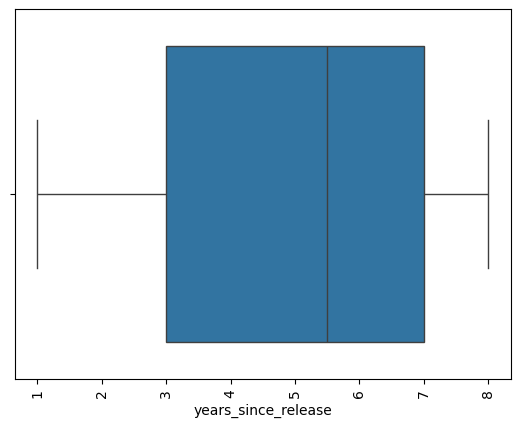

In [ ]:
# plotting the data after splitting into test and train
sns.boxplot(data=X_train, x='years_since_release')
plt.xticks(rotation=90);

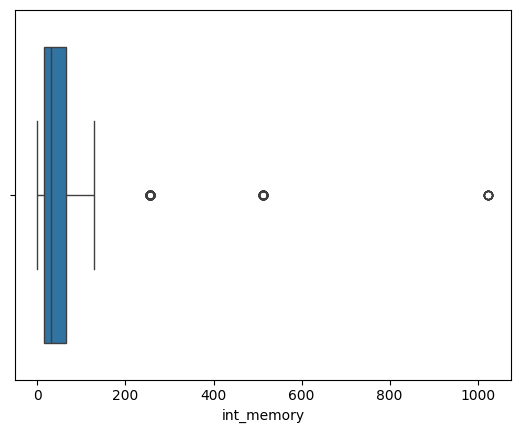

In [ ]:
# plotting int_memory
sns.boxplot(data=X_train, x='int_memory');

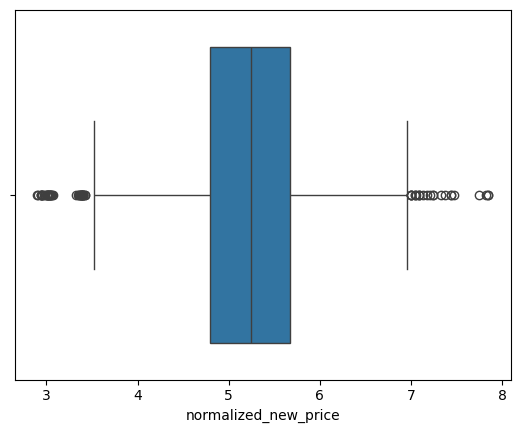

In [ ]:
# plotting each columns after splitting
sns.boxplot(data=X_train, x='normalized_new_price');

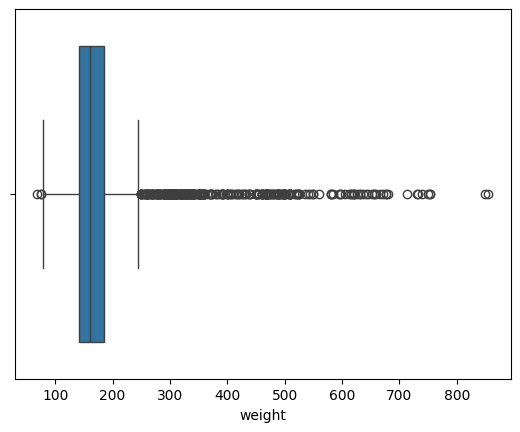

In [ ]:
# plotting columns after splitting
sns.boxplot(data=X_train, x='weight');

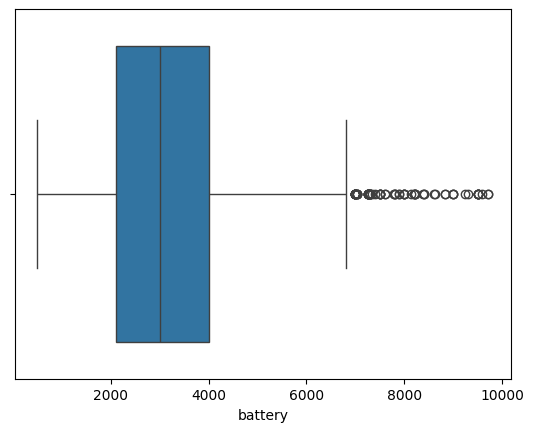

In [ ]:
# plotting columns after splitting
sns.boxplot(data=X_train, x='battery');

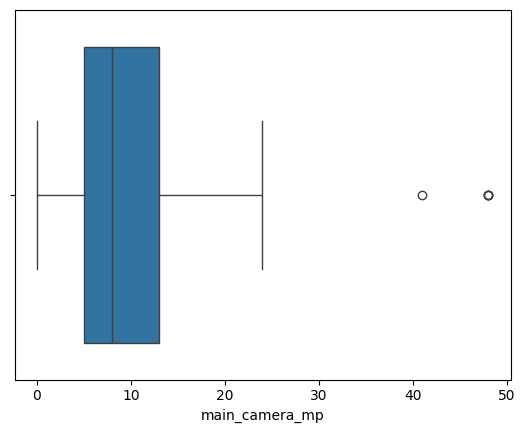

In [ ]:
# plotting collumns after splitting
sns.boxplot(data=X_train, x='main_camera_mp');

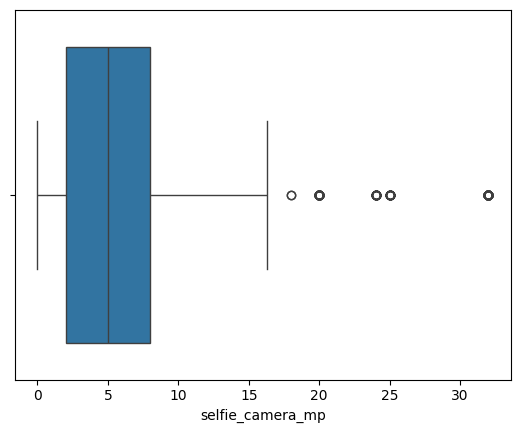

In [ ]:
# plotting collumns after splitting
sns.boxplot(data=X_train, x='selfie_camera_mp');

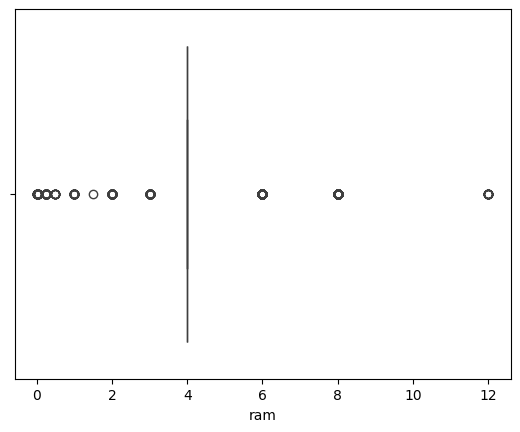

In [ ]:
# plotting collumns after splitting
sns.boxplot(data=X_train, x='ram');

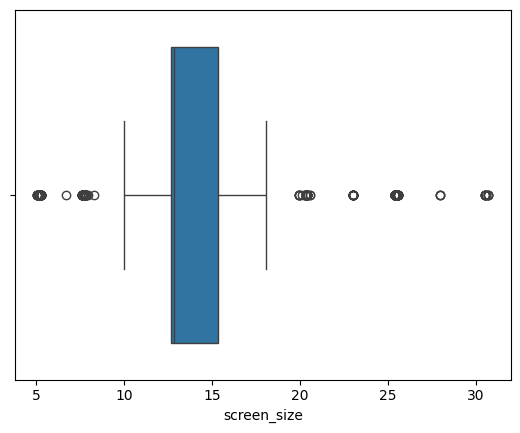

In [ ]:
# plotting collumns after splitting
sns.boxplot(data=X_train, x='screen_size');

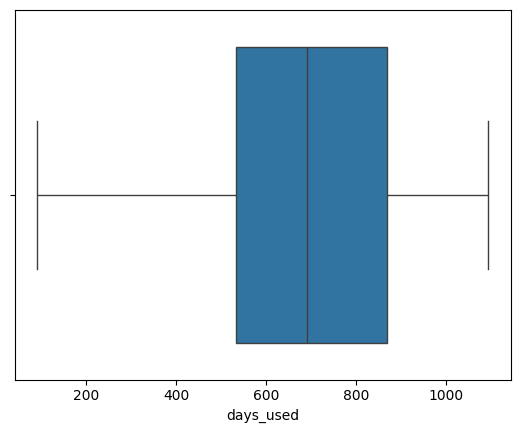

In [ ]:
# plotting collumns after splitting
sns.boxplot(data=X_train, x='days_used');

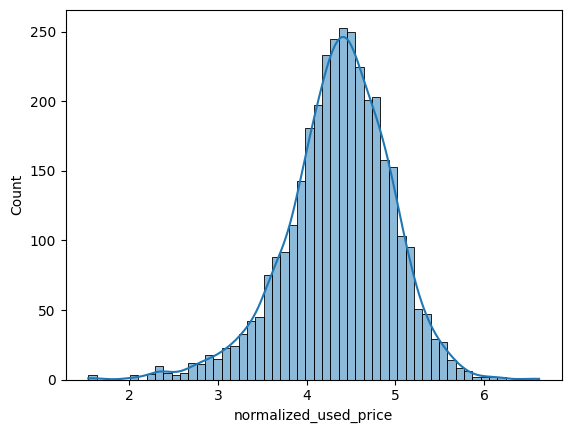

In [ ]:
# plotting y train set for check normality
sns.histplot(data=y_train, kde=True);

## Model Performance Check

We will check root mean squared error, r2, mean absolute percentage error and mean absolute error of the splitted data

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    '''
    model: regressor
    predictors: independent variables
    target: dependent variable
    '''
    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Compute metrics
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame({
        'MAE': [mae],
        'R-squared': [r2],
        'Adj. R-squared': [adjr2],
        'MAPE': [mape],
        'RMSE': [rmse]
    })

    return df_perf

In [ ]:
# performance check for train and test data
train_perf = model_performance_regression(lr_sm, X_train, y_train)
test_perf = model_performance_regression(lr_sm, X_test, y_test)


In [ ]:
train_perf

,MAE,R-squared,Adj. R-squared,MAPE,RMSE
0,0.180439,0.845445,0.843221,4.338646,0.231489


In [ ]:
test_perf

,MAE,R-squared,Adj. R-squared,MAPE,RMSE
0,0.180526,0.849277,0.841794,4.383438,0.233158


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will check the following:
1. No multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No heterosceasticity

In [ ]:
# Checking VIF
def check_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [ ]:
# checking vif of training data set
check_vif(X_train)

,Features,VIF
0,const,218.57
12,brand_name_Apple,14.63
46,os_iOS,13.64
34,brand_name_Others,9.38
1,screen_size,7.23
37,brand_name_Samsung,7.10
7,weight,5.77
21,brand_name_Huawei,5.71
10,years_since_release,4.89
24,brand_name_LG,4.79


**Checking Multicollinearity: **
1. Drop columns having VIF greater than 5
2. Look at the adjusted r2 and rmse of all these models
3. Drop the variable that makes the least change in adjusted r2
4. Check the vif scores again
5. Continue till you get all vif scores under 5

In [ ]:
# defining the function
def treating_multicollinearity(predictors, target, high_vif_columns):
  '''
  Checking the effect of dropping the columns showing high multicollinearity
  on model performance (adj. R-squared and RMSE)

  predictors: independent variables
  target: dependent variable
  high_vif_columns: columns having high multicollinearity
  '''
  # empty lists to store adj. R-squared and RMSE values
  adj_r2 = []
  rmse = []

  # build ols model by dropping one of the high vif columns at a time
  # store the adj r2 and rmse in the lists defibed previously
  for cols_in_vif in high_vif_columns:
    #defining the new train set
    train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

    # create the model
    model = sm.OLS(target, train).fit()

    # adding adj. r2 and rmse to the lists
    adj_r2.append(model.rsqaured_adj)
    rmse.append(np.sqrt(mean_squared_error(target, model.predict(train))))

    #creating a dataframe for the results
    temp = pd.DataFrame({
        'col': high_vif_columns,
        'adj_r2': adj_r2,
        'RMSE': rmse
    }).sort_values(by='adj_r2', ascending=False)
    temp.reset_index(drop=True, inplace=True)
    return temp


In [ ]:
# dropping the columns having vif values greater than 5
col_to_drop = ['screen_size','weight', 'brand_name']
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(tuple(col_to_drop))]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(tuple(col_to_drop))]

# checking vif now
vif = check_vif(x_train2)
vif

,Features,VIF
0,const,102.66
8,years_since_release,4.43
2,selfie_camera_mp,2.56
7,normalized_new_price,2.54
6,days_used,2.49
12,4g_yes,2.24
4,ram,2.11
1,main_camera_mp,1.82
13,5g_yes,1.78
5,battery,1.61


**Check for high p_value:**

We will drop the variables having p value greater than 0.05.
- we will drop the columns having highest p value
- create a new model, check the p value without dropping feature and then drop the columns with highest p value
- Repeat the steps till there are no columns with high p value

In [ ]:
# copy the data of x train 2 as predictors
predictors = x_train2.copy()
cols = predictors.columns.tolist()

#setting on initial max p_value
max_p_value = 1

while len(cols)>0:
  #defining the train set
  x_train_aux = predictors[cols]

  # fitting the model
  model = sm.OLS(y_train, x_train_aux).fit()

  # getting the p_values and the max p_values
  p_values = model.pvalues
  max_p_value = max(p_values)

  # name of the variables with max p values
  feature_with_p_max = p_values.idxmax()

  if max_p_value > 0.05:
    cols.remove(feature_with_p_max)
  else:
      break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'normalized_new_price', 'years_since_release', 'os_Others']


In [ ]:
# assign the variable to selected features of x train2 and test2
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
# summarize the new assigned data set
olsmodel2 = sm.OLS(y_train, x_train3)
lr_sm2 = olsmodel2.fit()
print(lr_sm2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.818
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     2215.
Date:                   Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                           00:18:31   Log-Likelihood:                -127.88
No. Observations:                   3454   AIC:                             271.8
Df Residuals:                       3446   BIC:                             320.9
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking performances of new train and test data set
print('training preformance')
train_perf2 = model_performance_regression(lr_sm2, x_train3, y_train)
print(train_perf2)

print('testing performance')
test_perf2 = model_performance_regression(lr_sm2, x_test3, y_test)
print(test_perf2)

training preformance
        MAE  R-squared  Adj. R-squared      MAPE      RMSE
0  0.194668   0.818153        0.817731  4.702537  0.251097
testing performance
        MAE  R-squared  Adj. R-squared      MAPE      RMSE
0  0.193038   0.825784        0.824428  4.717727  0.250671


**Test for linearity and independence:**
- We will test the linearity and independence by making a plot of fitted values vs residuals and check for patterns
- If there is no pattern, then there is linearity and residuals are independent
- otherwise, it is non-linear

In [ ]:
# assinging the data set with actual, fitted values and residuals
df_pred = pd.DataFrame()

df_pred['Actual Values'] = y_train
df_pred['Fitted Values'] = lr_sm2.fittedvalues
df_pred['Residuals'] = lr_sm2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.307572,4.237727,0.069845
1,5.162097,4.939709,0.222388
2,5.111084,5.007092,0.103992
3,5.135387,5.153666,-0.018279
4,4.389995,4.572272,-0.182277


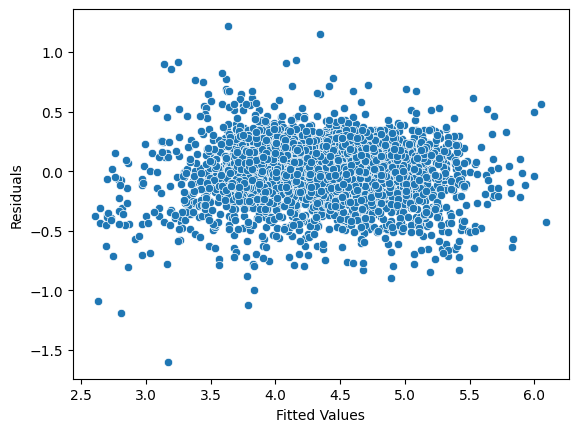

In [ ]:
# Let's plot the fiited values vs residuals, if there is not pattern and we can say that model is linear
sns.scatterplot(data=df_pred, x='Fitted Values', y='Residuals');

**Test for Normality:**
- If the curve shows normal distribution, they will make straight line
- And the p value should be greater than 0.05 and if not then it does not follow normal distribution.
- Sometimes, if the curve shows normal distribution as well as line plot shows normal distribution as well, we can overlook on shapiro's pvalue if by chance it comes less than 0.05

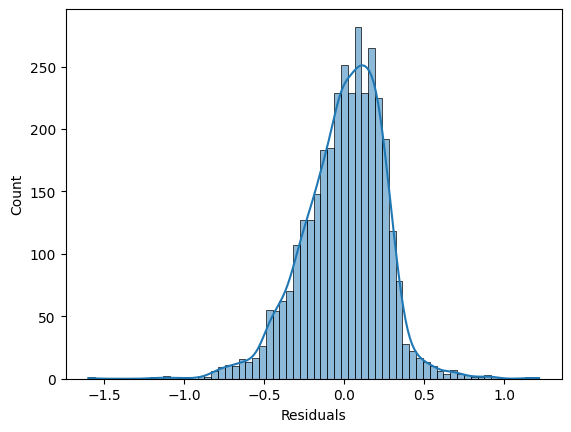

In [ ]:
# plotting graph to check normality
sns.histplot(data=df_pred, x='Residuals', kde=True);

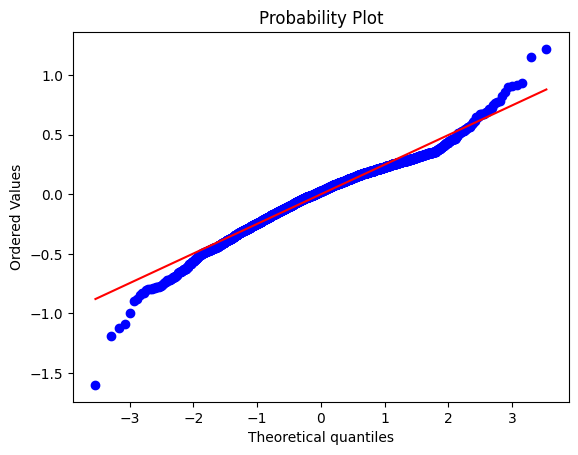

In [ ]:
# plotting graph to check the line alignment
import pylab
import scipy.stats as stats
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab);

In [ ]:
# checking shapiro's p value for normality
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9776063017530259, pvalue=6.480832942317231e-23)

**Test for Homoscedasticity:**
- If p value is greater than 0.05, we can say that the residuals are homoscedastic

In [ ]:
# importing libraries to performn lzip
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Perform the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(df_pred['Residuals'], df_pred[['Fitted Values']])

# defining name
name = ['F statistic', 'p value']

# The test function returns a tuple (F-statistic, p-value), so we use lzip to pair them with names
results = lzip(name, test)

# Print results
print(results)

[('F statistic', 0.8527158482345004), ('p value', 0.9995292447483343)]


## Final Model

In [ ]:
# checking the summary of final model
olsmodel_final = sm.OLS(y_train, x_train3)
lr_sm_final = olsmodel_final.fit()
print(lr_sm_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.818
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     2215.
Date:                   Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                           00:18:32   Log-Likelihood:                -127.88
No. Observations:                   3454   AIC:                             271.8
Df Residuals:                       3446   BIC:                             320.9
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking the perfomance of train and test data set of new model
print('Training Performance')
train_perf_final = model_performance_regression(lr_sm_final, x_train3, y_train)
print(train_perf_final)

print('Testing Performance')
test_perf_final = model_performance_regression(lr_sm_final, x_test3, y_test)
print(test_perf_final)

Training Performance
        MAE  R-squared  Adj. R-squared      MAPE      RMSE
0  0.194668   0.818153        0.817731  4.702537  0.251097
Testing Performance
        MAE  R-squared  Adj. R-squared      MAPE      RMSE
0  0.193038   0.825784        0.824428  4.717727  0.250671


## Actionable Insights and Recommendations

**Actionble Insights:**

1. The data contains maximum Android os
2. Weight of device and battery are correlated with each other means high weight contains large battery as well as weight is directly correlated with normalized used price
3. Release year and normalized used price are correlated to each other which means latest year of release will have increased used market value
4. Normalized used price does not depend on how many days the device has been used
5. Normalized used price is direclty proportional to normalized new price
6. The very first model which was distributed in 70-30 ratio of train and test data showed r2 value of 0.845 and adj r2 value of 0.843
7. Usually adj r2 value is lower than r2 value
8. The RMSE value was 0.231 of train and 0.233 of test
9. The MAE of train was 0.1804 and 0.1805 of test
10. The MAPE of train was 4.33 and 4.38 of test
11. The following columns contained greater than 5 VIF value: screen size, weight and brand name, all of which was dropped to reduce the multicollinearity
12. Brand name column affected least in reducing the multicollinearity
13. Weight column was the most important which highly affected in reducing the R2 value of the model and after dropping the column we saw reduction in r2 value which means it is important factor in predicting the price of used device
14. The columns containing larger than 0.05 p value was dropped to reduce multicollinearity
15. To check if the model meets all the assumptions of linear regression, graph of fitted values and residuals were plotted which showed no linearity which means its linear and independent
16. To check the normality assumption, residuals histplot were plotted and it showed the normal distribution. Also, the line plot of residuals showed linear line plot which also says it is normally distributed. Lastly, shapiro's pvalue was checked and it was less then 0.05. However, if we have normal distribution curve with linear line plot, we can overlook shapiro's p-value. Hence, we can say that the model meets normality assumption
17. If the Residuals and fitted value pvalue is greater 0.05 for homoscedasticity, we can say that Residuals are homoscedastic. In this project, we got p_value 0.99 which means residuals are uniform for all predicted values.
18. After checking all assumptions and dropping higher vif and pvalue columns, final summary and performance check was done whose results are as follows:
R2: 0.818, Adj R2: 0.825
RMSE: Train - 0.251, Test - 0.250
MAPE: Train - 4.702, Test - 4.717
MAE: Train - 0.196, Test - 0.193

Hence, concluded that the final model is less accurate than the previous model as it decreases the R2 and adj R2 as well as enhances RMSE, MAPE and MAE errors.


**Recommendations:**

1. Normalized used price is predicted on the factors which it is also directly proportional to such as normalized new price, battery, weight and release year.
2. Normalized used price is not correlated to device usage.
3. Brand name affects least to reduce the multicollinearity so we can keep it instead of dropping it.
4. The final model showing reduced R2 and adj R2 which basically means it could be an overfit model as we have dropped too many columns from the data resulting in reduced accuracy of the model.
5. The increase in errors means some of the dropped columns must have been crucial fot predicting the y value.
6. The model meets almost all the assumptions of linear regression
7. Weight columns which contained high vif was important for predicting the value of used device so it should not be dropped for reducing multicollinearity

___